<a href="https://colab.research.google.com/github/Pranjali012/Sentiment-Analysis/blob/main/Sentiment_analysis_for_movie_reviews_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
data=pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [28]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review,sentiment  50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [ ]:
data.dtypes

review,sentiment    object
dtype: object

In [5]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
data.isnull()

,"review,sentiment"
0,False
1,False
2,False
3,False
4,False
...,...
49995,False
49996,False
49997,False
49998,False


In [ ]:
data.isnull().sum()

review,sentiment    0
dtype: int64

In [ ]:
data.isnull().values.any()



False

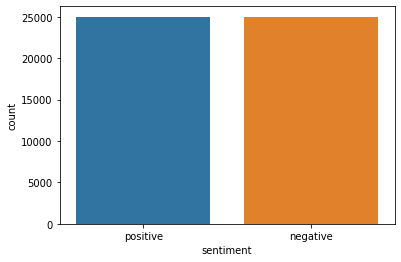

In [6]:
import seaborn as sns

sns.countplot(x='sentiment', data=data)

In [ ]:
data.shape

(50000, 2)

In [29]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
LE = LabelEncoder()
OE= OneHotEncoder()
data['sentiment'] = LE.fit_transform(data['sentiment'])
print(data['sentiment'].unique())
print(data['sentiment'].shape)


[1 0]
(50000,)


In [30]:
pip install wordcloud matplotlib

In [31]:
print("Categories:", np.unique(data['sentiment']))
print("Number of unique words:", len(np.unique(np.hstack(data))))


length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))



Categories: [0 1]
Number of unique words: 2
Average Review length: 7.5
Standard Deviation: 2


In [32]:
from sklearn.model_selection import train_test_split
X=data['review']
y=data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print(X_train.shape,y_train.shape,X_val.shape)
print(X_test.shape,y_test.shape,y_val.shape)



(30000,) (30000,) (10000,)
(10000,) (10000,) (10000,)


In [33]:

tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

In [34]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
data['review']=data['review'].apply(denoise_text)

In [35]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

In [36]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
data['review']=data['review'].apply(simple_stemmer)

In [37]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)

{'against', 'from', 'while', 'your', 'such', 'had', 'before', 'few', 'y', 'at', "she's", "hasn't", "shouldn't", "mustn't", 'they', 'below', 'shan', 're', 'so', 'am', 'that', 'each', 'how', 'i', 'hadn', 'same', 'out', 'me', 'some', 'did', 'we', 'were', 'didn', 'yourself', 'theirs', "that'll", 'is', "isn't", 'themselves', 'd', 'has', "needn't", 'in', 'aren', 'this', 'after', 'further', 'does', 'do', "wasn't", 'what', 'ourselves', 'being', "haven't", 'weren', "don't", 'and', 's', "aren't", 'ma', 'more', 'about', 'haven', 'o', 'on', 'he', 'its', "mightn't", 'hers', "wouldn't", 'to', 'because', 'herself', 'any', 'mustn', 'both', 'nor', 'yours', 'should', 'who', 'just', 'needn', "you've", 'down', 'other', 'having', 'very', "couldn't", 'yourselves', 'as', 'can', 'here', 'whom', 'under', 'again', 'you', 'her', 'have', 'will', 'itself', 'there', 'during', 'couldn', 'not', 'off', 'the', 'but', 'through', 'wasn', 'don', 'with', 'was', 'mightn', 'our', 'doing', 'those', "it's", 'for', 'most', 'too

In [38]:
#normalized train reviews
norm_train_reviews=X_train
norm_train_reviews[0]


"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [39]:
#Normalized test reviews
norm_test_reviews=X_test
norm_test_reviews[35067]


"I thought maybe... maybe this could be good. An early appearance by the Re-Animator (Jeffery Combs); many homage's to old horror movies; the Troma label on the front\x85 this movie could be a gem! I thought wrong.<br /><br />Frightmare is a boring, overplayed, half assed homage to the fright films of yore. The story is an old one, young people breaking into a house, getting drunk, making love, and tampering with things that shouldn't be tampered with. The oft \x96 recycled slasher film formula is used here, this time with a thought to be dead actor named Conrad Radzoff doing the killing. In fact, the performance by the Radzoff's actor Ferdy Mayne is the only redeeming quality of this film. He does the snooty Dracula style character very well. But as for the kids, its not so good, with Combs only having a minimal part.<br /><br />The film lacks entertainment value, and only features one cool character, and one or two scenes that can hold your attention. I do not recommend this film unl

In [40]:
norm_val_reviews=X_val
norm_val_reviews[10335]

'At the end of the film I just asked myself :"is it the worse movie I have ever seen or is it the worse movie I have ever seen ?". And the answer is... Actually, after having seen this movie and thought a bit about the meaning of it, you just can\'t find any meaning and you can only remember the two rape scenes, which are unbelievably brutal and useless. It seems to me as if the director tried to push this question into the crowd\'s head : "what are such crimes compared to horror of war and extermination ?" because i noticed that the two awful scenes where directly connected to war and it\'s horrors (during the first scene you can here the girl that is being raped screaming and in the same time you hear one of president Bush\'s speeches about the necessity of starting a war with Iraq and in the second scene, the pictures of the three criminals sticking a sword in a woman\'s vagina, are directly followed by archive pictures of World war II. But as a matter of facts, i really could not t

In [41]:

cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv_train_reviews=cv.fit_transform(norm_train_reviews)
cv_test_reviews=cv.transform(norm_test_reviews)
cv_val_reviews=cv.transform(norm_val_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
print('BOW_cv_val:',cv_val_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (30000, 4918988)
BOW_cv_test: (10000, 4918988)
BOW_cv_val: (10000, 4918988)


In [42]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
tv_val_reviews=tv.transform(norm_val_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)
print('Tfidf_val:',tv_val_reviews.shape)

Tfidf_train: (30000, 4918988)
Tfidf_test: (10000, 4918988)
Tfidf_val: (10000, 4918988)


In [43]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,y_train)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,y_train)
print(lr_tfidf)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [44]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_val_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_val_reviews)
print(lr_tfidf_predict)

[0 1 1 ... 1 1 0]
[0 1 1 ... 1 1 1]


In [45]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score( y_val,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score( y_val,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)


lr_bow_score : 0.7622
lr_tfidf_score : 0.7582


In [46]:
#Classification report for bag of words 
lr_bow_report=classification_report(y_val,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(y_val,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.77      0.74      0.76      5024
    Negative       0.75      0.78      0.77      4976

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

              precision    recall  f1-score   support

    Positive       0.79      0.70      0.75      5024
    Negative       0.73      0.81      0.77      4976

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [47]:

#confusion matrix for bag of words
cm_bow=confusion_matrix(y_val,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(y_val,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3881 1095]
 [1283 3741]]
[[4043  933]
 [1485 3539]]


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
auc_roc=metrics.roc_auc_score(y_val,lr_bow_predict)
auc_roc

0.7622847630409405

In [49]:
y_prob = lr.predict_proba(cv_val_reviews)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
lr.score(cv_val_reviews, y_pred)

1.0

In [50]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.840262279642923

Text(0.5, 0, 'False Positive Rate')

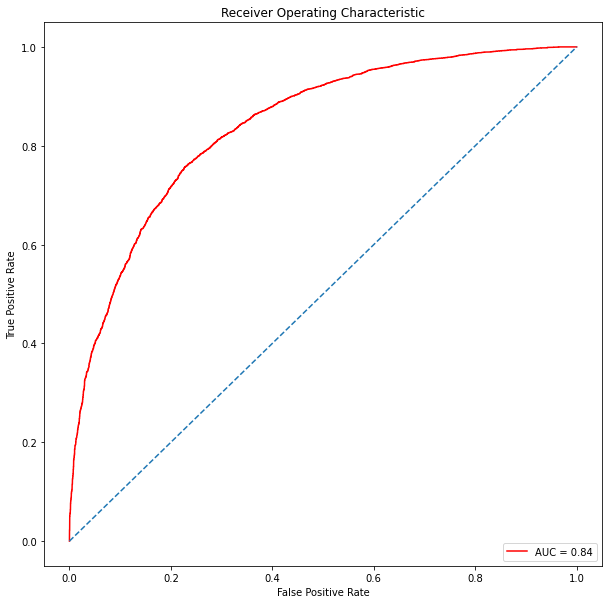

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
auc_roc=metrics.roc_auc_score(y_val,lr_tfidf_predict)
auc_roc

0.7584593949044586

In [56]:
y_prob = lr.predict_proba(tv_val_reviews)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
lr.score(tv_val_reviews, lr_tfidf_predict)

1.0

In [59]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7584593949044586

Text(0.5, 0, 'False Positive Rate')

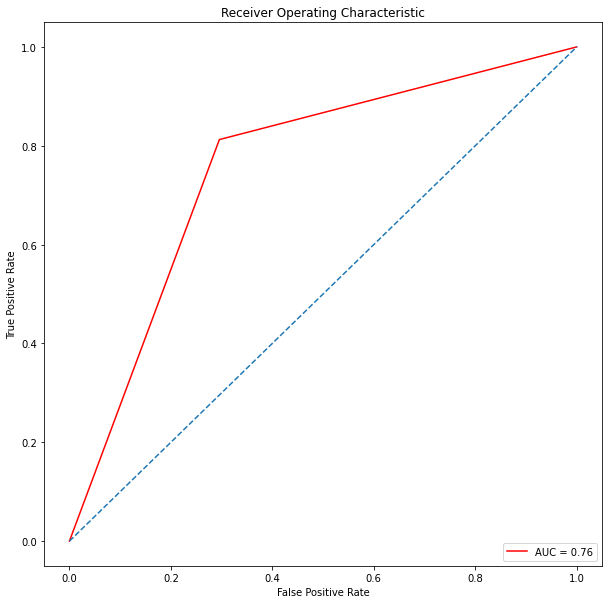

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [61]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,y_train)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,y_train)
print(svm_tfidf)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [62]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_val_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_val_reviews)
print(svm_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [63]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(y_val,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(y_val,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.5131
svm_tfidf_score : 0.4976


In [64]:
#Classification report for bag of words 
svm_bow_report=classification_report(y_val,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(y_val,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       1.00      0.03      0.06      5024
    Negative       0.51      1.00      0.67      4976

    accuracy                           0.51     10000
   macro avg       0.75      0.52      0.37     10000
weighted avg       0.75      0.51      0.36     10000

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00      5024
    Negative       0.50      1.00      0.66      4976

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(y_val,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(y_val,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4976    0]
 [4869  155]]
[[4976    0]
 [5024    0]]


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
auc_roc=metrics.roc_auc_score(y_val,svm_bow_predict)
auc_roc

0.5154259554140128

In [67]:
y_prob = svm.predict_proba(tv_val_reviews)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
svm.score(tv_val_reviews, y_pred)

AttributeError: ignored

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8417776745576219

Text(0.5, 0, 'False Positive Rate')

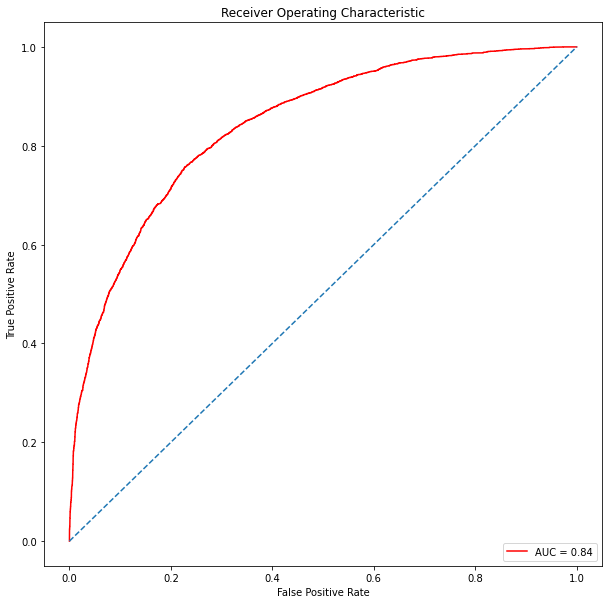

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
y_prob = svm.predict_proba(tv_val_reviews)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
svm.score(tv_val_reviews, y_pred)

AttributeError: ignored

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [68]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,y_train)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,y_train)
print(mnb_tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [69]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_val_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_val_reviews)
print(mnb_tfidf_predict)

[0 1 1 ... 1 1 0]
[0 1 1 ... 1 1 0]


In [70]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(y_val,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(y_val,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.7631
mnb_tfidf_score : 0.7624


In [71]:
#Classification report for bag of words 
mnb_bow_report=classification_report(y_val,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(y_val,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.76      0.76      0.76      5024
    Negative       0.76      0.76      0.76      4976

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

              precision    recall  f1-score   support

    Positive       0.77      0.74      0.76      5024
    Negative       0.75      0.78      0.77      4976

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [72]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(y_val,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(y_val,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3790 1186]
 [1183 3841]]
[[3885 1091]
 [1285 3739]]


In [73]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
auc_roc=metrics.roc_auc_score(y_val,mnb_bow_predict)
auc_roc

0.7630931016650623

In [74]:
y_prob = mnb.predict_proba(cv_val_reviews)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mnb.score(cv_val_reviews, y_pred)

1.0

In [75]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, mnb_tfidf_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7624876477154033

Text(0.5, 0, 'False Positive Rate')

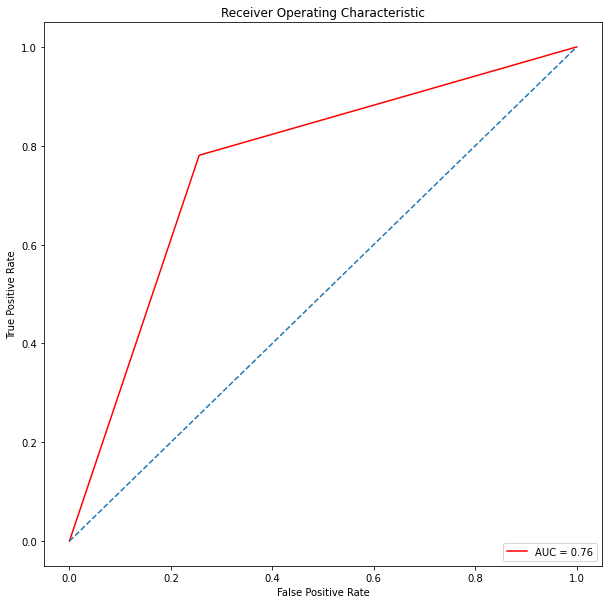

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [77]:
y_prob = mnb.predict_proba(tv_val_reviews)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mnb.score(tv_val_reviews, y_pred)

1.0

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
auc_roc=metrics.roc_auc_score(y_val,mnb_bow_predict)
auc_roc

0.7630931016650623

Text(0.5, 0, 'False Positive Rate')

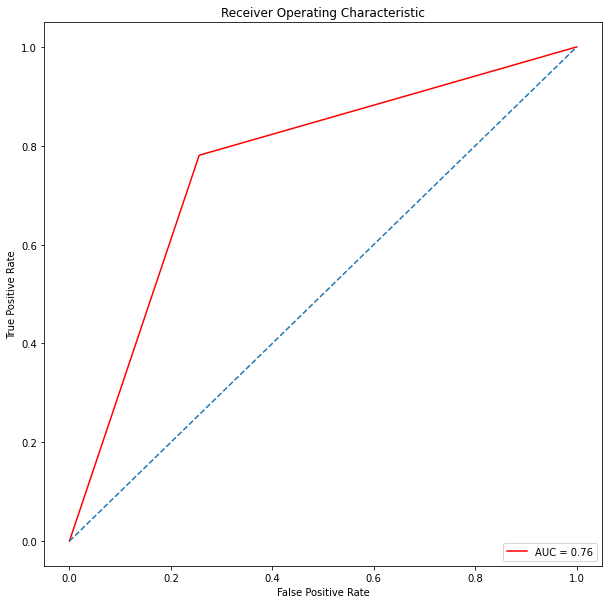

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % auc_roc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(cv_train_reviews, y_train)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn.fit(tv_train_reviews, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(cv_val_reviews)
predtv=knn.predict(tv_val_reviews)

In [ ]:
print(pred)

[0 1 0 ... 0 0 0]


In [ ]:
print(predtv)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val ,pred))
print(classification_report(y_val ,predtv))

              precision    recall  f1-score   support

           0       0.51      0.85      0.63      5024
           1       0.52      0.16      0.25      4976

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.44     10000
weighted avg       0.51      0.51      0.44     10000

              precision    recall  f1-score   support

           0       0.50      0.85      0.63      5024
           1       0.50      0.15      0.24      4976

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.43     10000
weighted avg       0.50      0.50      0.44     10000



In [ ]:
cm_bow=confusion_matrix(y_val,pred,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(y_val,predtv,labels=[1,0])
print(cm_tfidf)

[[ 817 4159]
 [ 762 4262]]
[[ 768 4208]
 [ 759 4265]]


In [ ]:
knn_bow_score=accuracy_score(y_val,pred)
print("knn_bow_score :",knn_bow_score)
#Accuracy score for tfidf features
knn_tfidf_score=accuracy_score(y_val,predtv)
print("knn_tfidf_score :",knn_tfidf_score)

knn_bow_score : 0.5079
knn_tfidf_score : 0.5033


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
auc_roc=metrics.roc_auc_score(y_val,pred)
auc_roc

0.5062580641857989

In [ ]:
y_prob = knn.predict_proba(cv_val_reviews)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
knn.score(cv_val_reviews, y_pred)

1.0

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5101273733346816

Text(0.5, 0, 'False Positive Rate')

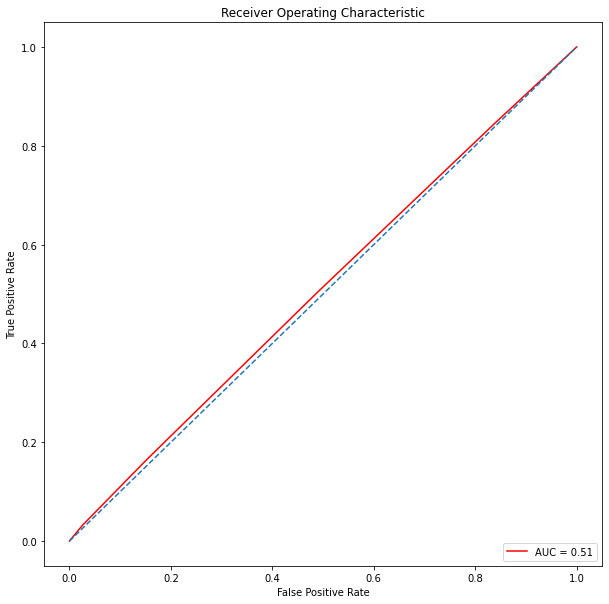

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
y_prob = knn.predict_proba(tv_val_reviews)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
knn.score(tv_val_reviews, y_pred)

1.0

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5009371815926639

Text(0.5, 0, 'False Positive Rate')

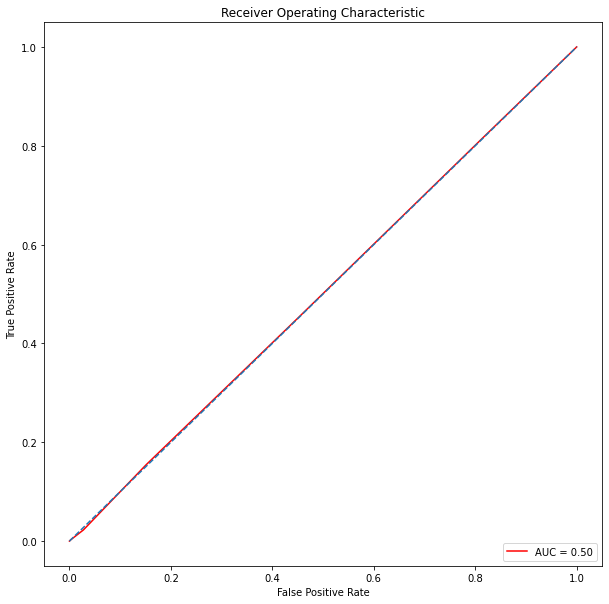

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')